# Plot CMIP ZOS fields

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = '../outputs/'

In [3]:
!ls {data_dir}

CMIP5_SeaLevel_rcp85_zostoga_1986-2100.nc
CMIP5_zos_rcp85_ACCESS1-0_2006_2008.nc
CMIP5_zos_rcp85_ACCESS1-0_2006_2101.nc
CMIP5_zos_rcp85_ACCESS1-0_2098_2100.nc
CMIP5_zos_rcp85_ACCESS1-0_2099_2101.nc
CMIP5_zos_rcp85_CCSM4_2006_2008.nc
CMIP5_zos_rcp85_CCSM4_2006_2101.nc
CMIP5_zos_rcp85_CCSM4_2098_2100.nc
CMIP5_zos_rcp85_CCSM4_2099_2101.nc
CMIP5_zos_rcp85_CMCC-CESM_2006_2008.nc
CMIP5_zos_rcp85_CMCC-CESM_2098_2100.nc
CMIP5_zos_rcp85_CMCC-CESM_2099_2101.nc
CMIP5_zos_rcp85_CMCC-CMS_2006_2008.nc
CMIP5_zos_rcp85_CMCC-CMS_2098_2100.nc
CMIP5_zos_rcp85_CMCC-CMS_2099_2101.nc
CMIP5_zos_rcp85_CMCC-CM_2006_2008.nc
CMIP5_zos_rcp85_CMCC-CM_2098_2100.nc
CMIP5_zos_rcp85_CMCC-CM_2099_2101.nc
CMIP5_zos_rcp85_CNRM-CM5_2006_2008.nc
CMIP5_zos_rcp85_CNRM-CM5_2098_2100.nc
CMIP5_zos_rcp85_CNRM-CM5_2099_2101.nc
CMIP5_zos_rcp85_CSIRO-Mk3-6-0_2006_2008.nc
CMIP5_zos_rcp85_CSIRO-Mk3-6-0_2006_2101.nc
CMIP5_zos_rcp85_CSIRO-Mk3-6-0_2098_2100.nc
CMIP5_zos_rcp85_CSIRO-Mk3-6-0_2099_2101.nc
CMIP5_zos_rcp85_CanESM2_2006_2008.

In [4]:
def plot_all_models(ds):
    nb_cols = 3
    nb_rows = int(np.ceil(len(ds.model)/nb_cols))
    fig, axes = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(14,30))

    for idx, mod in enumerate(ds.model):
        ds['CorrectedReggrided_zos'].isel(time=0,model=idx).plot(
            ax=axes[int(idx/nb_cols),idx%nb_cols])
    fig.tight_layout()

### Look at CMIP5 fields

In [30]:
cmip5_zos = xr.open_mfdataset(data_dir+'CMIP5_zos_rcp85_*_2006_2008.nc')
cmip5_zos.CorrectedReggrided_zos_rcp85

<xarray.DataArray 'CorrectedReggrided_zos_rcp85' (model: 30, time: 2, lat: 180, lon: 360)>
dask.array<shape=(30, 2, 180, 360), dtype=float64, chunksize=(1, 2, 180, 360)>
Coordinates:
  * time     (time) float64 2.006e+03 2.008e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * model    (model) object 'ACCESS1-0' 'CCSM4' ... 'bcc-csm1-1' 'inmcm4'
Attributes:
    units:    cm

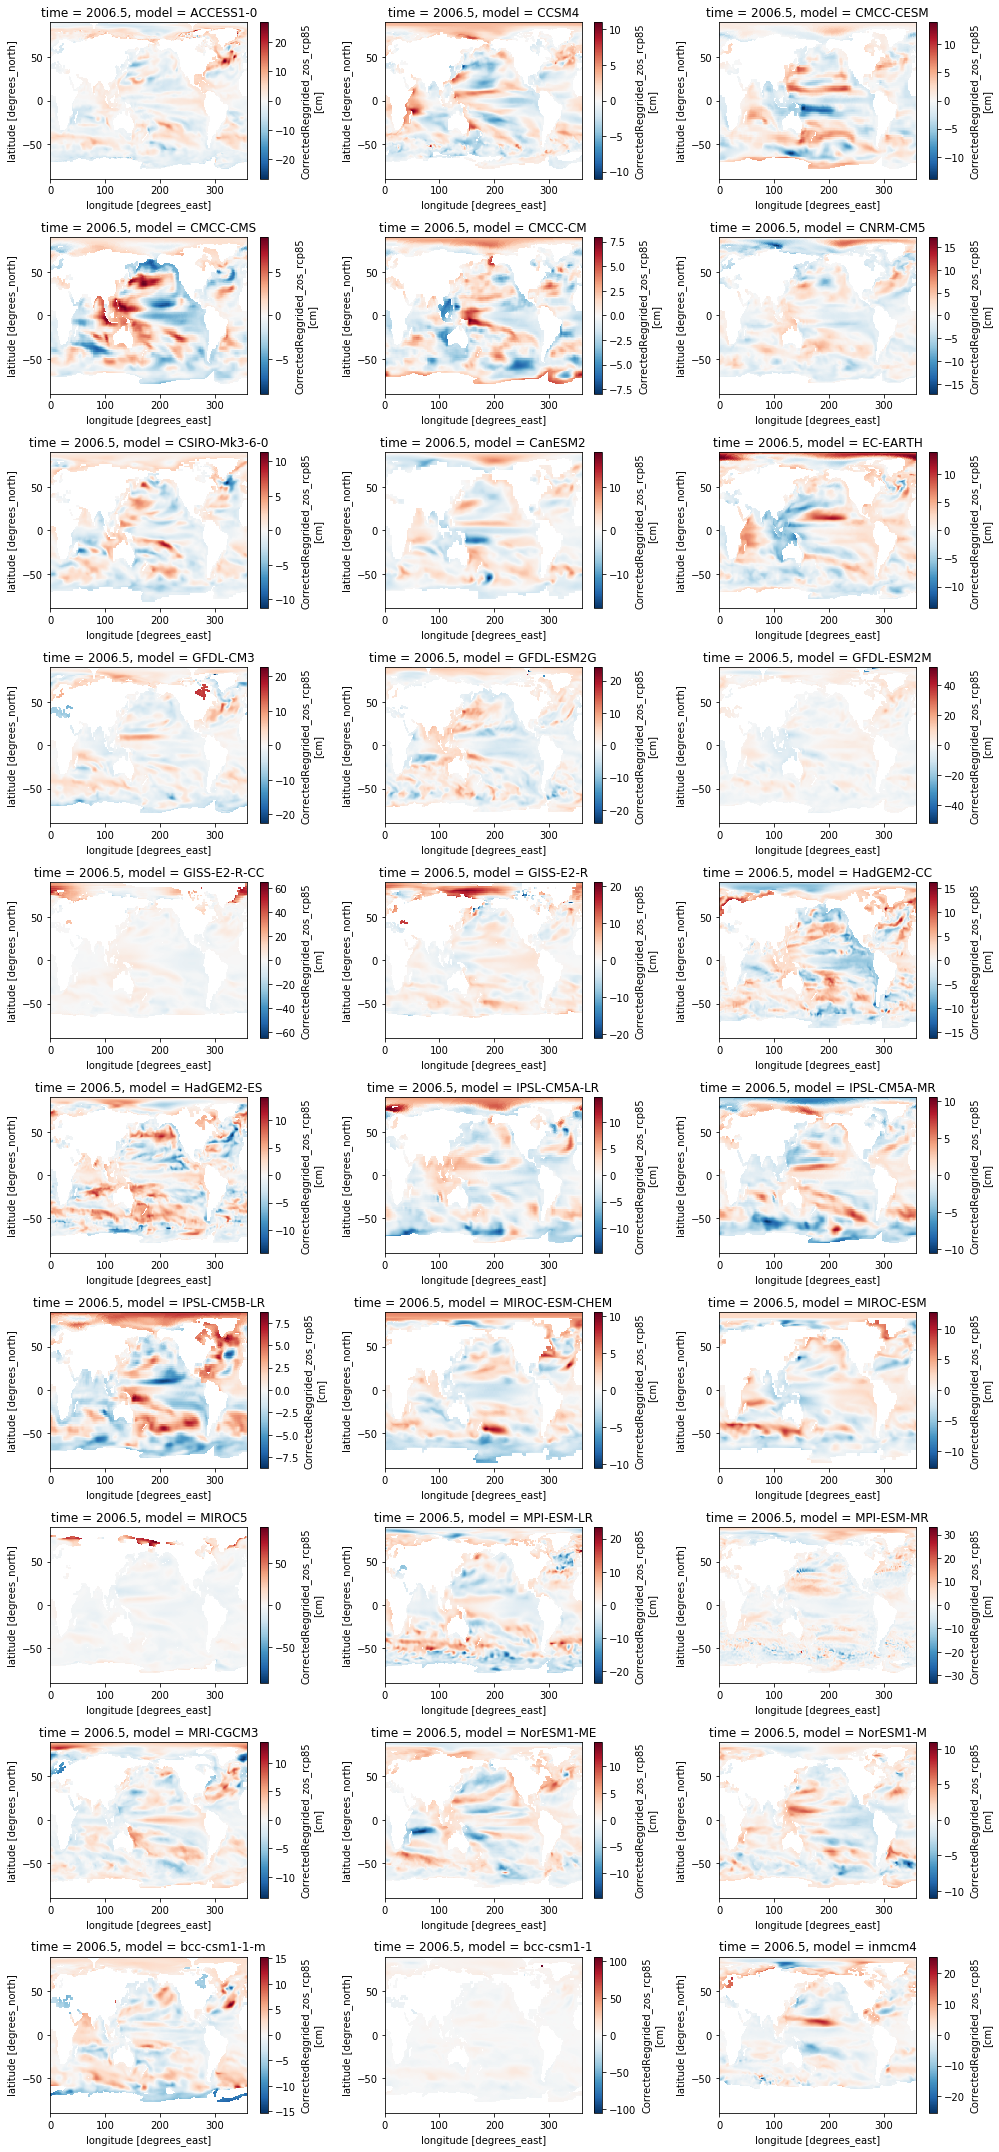

In [31]:
plot_all_models(cmip5_zos)

In [5]:
cmip5_zos_2100 = xr.open_mfdataset(data_dir+'CMIP5_zos_rcp85_*_2098_2100.nc')
cmip5_zos_2100

<xarray.Dataset>
Dimensions:                 (lat: 180, lon: 360, model: 30, time: 2)
Coordinates:
  * lon                     (lon) float64 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * time                    (time) float64 2.098e+03 2.1e+03
  * lat                     (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * model                   (model) object 'ACCESS1-0' 'CCSM4' ... 'inmcm4'
Data variables:
    CorrectedReggrided_zos  (model, time, lat, lon) float64 dask.array<chunksize=(1, 2, 180, 360), meta=np.ndarray>
Attributes:
    source_file:        This NetCDF file was built from ComputeOceanDynmicSea...
    creation_date:      2020-07-29 11:19
    emission_scenario:  rcp85

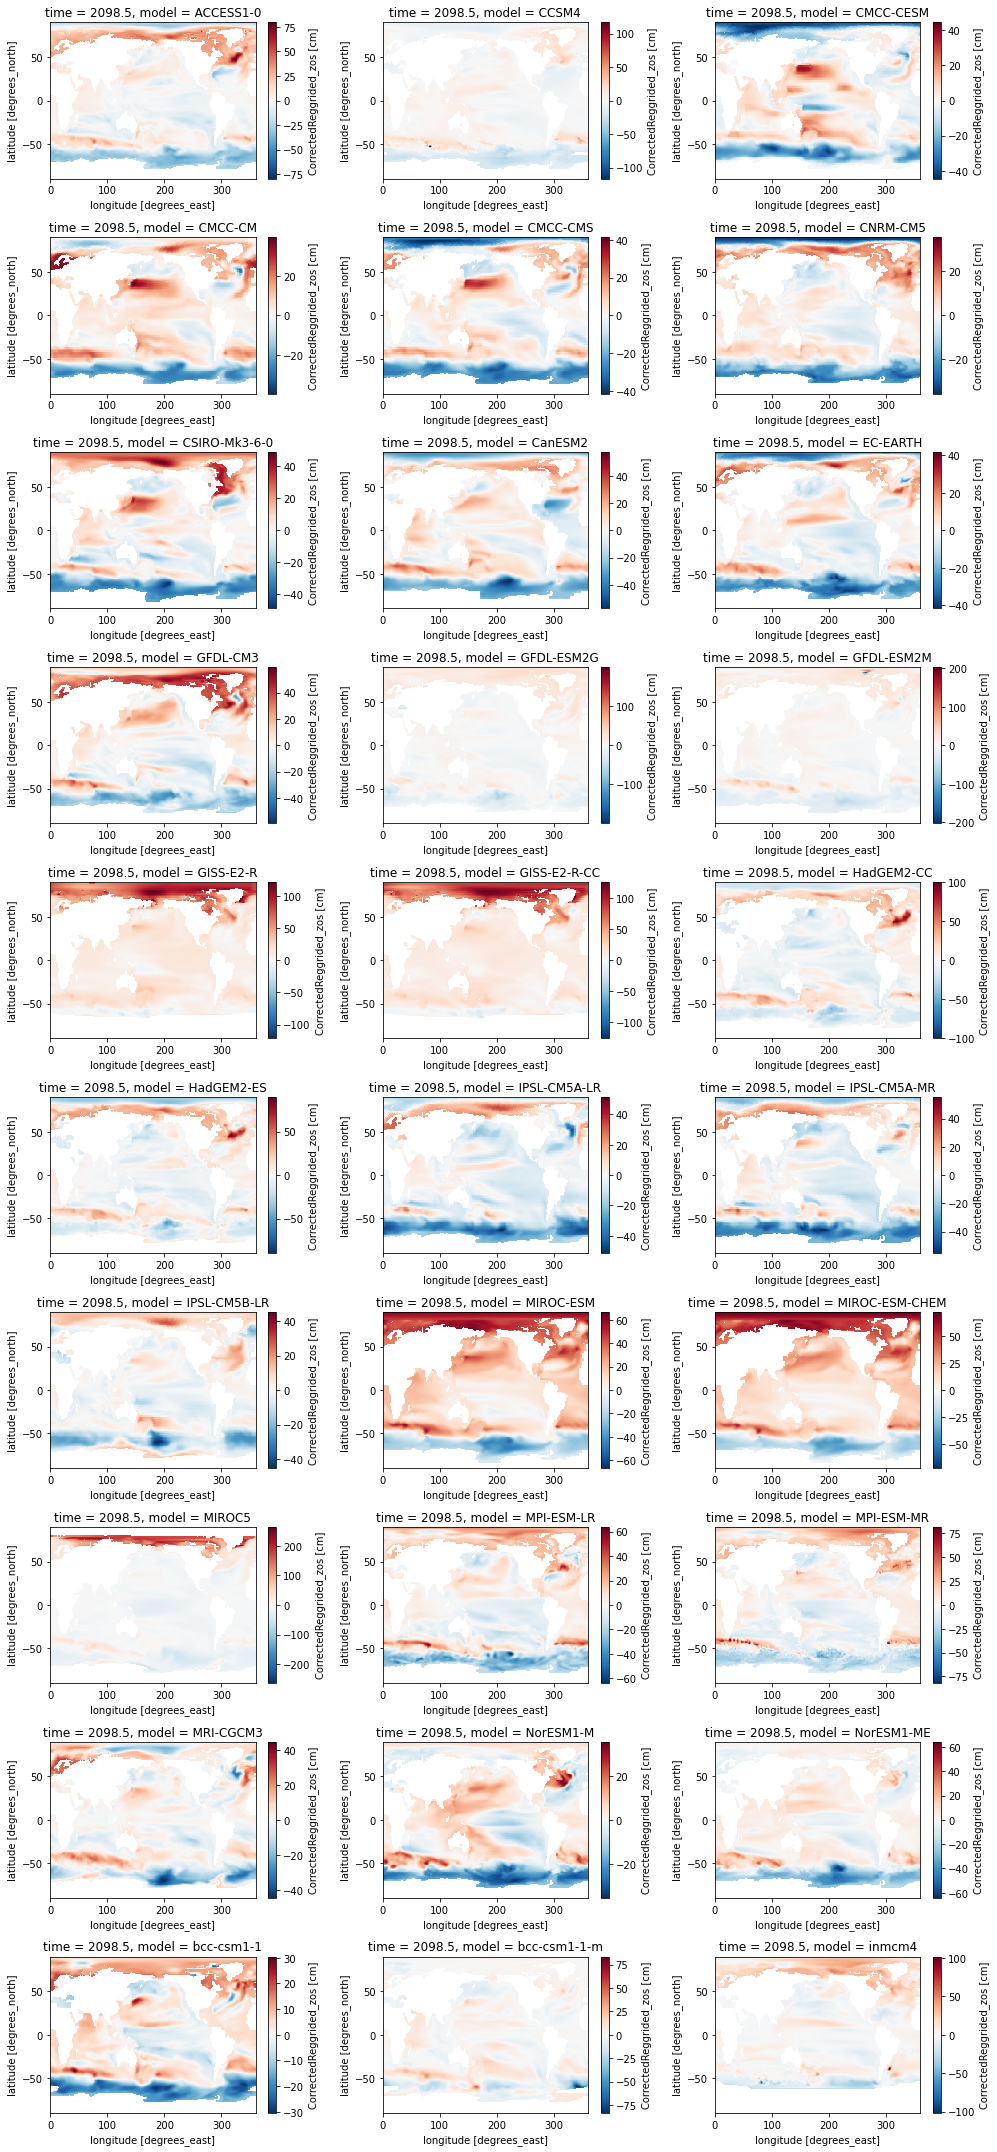

In [6]:
plot_all_models(cmip5_zos_2100)

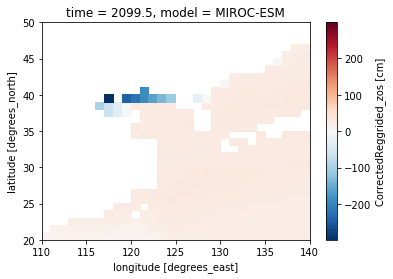

In [53]:
#'GISS-E2-R-CC', 'GISS-E2-R'
cmip5_zos_2100.CorrectedReggrided_zos.sel(model='MIROC-ESM', time=2099.5, 
                                           lat=slice(20,50), lon=slice(110,140)).plot() 

In [ ]:
#'GISS-E2-R-CC', 'GISS-E2-R'
cmip5_zos_2100.CorrectedReggrided_zos.sel(model='NorESM1-ME', time=2099.5, 
                                           lat=slice(39,46), lon=slice(26,42)).plot()

In [8]:
weights = np.cos(np.deg2rad(cmip5_zos_2100.lat))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (lat: 180)>
array([0.00872654, 0.02617695, 0.04361939, 0.06104854, 0.0784591 ,
       0.09584575, 0.11320321, 0.13052619, 0.14780941, 0.16504761,
       0.18223553, 0.19936793, 0.21643961, 0.23344536, 0.25038   ,
       0.26723838, 0.28401534, 0.3007058 , 0.31730466, 0.33380686,
       0.35020738, 0.36650123, 0.38268343, 0.39874907, 0.41469324,
       0.4305111 , 0.44619781, 0.46174861, 0.47715876, 0.49242356,
       0.50753836, 0.52249856, 0.53729961, 0.55193699, 0.56640624,
       0.58070296, 0.59482279, 0.60876143, 0.62251464, 0.63607822,
       0.64944805, 0.66262005, 0.67559021, 0.68835458, 0.70090926,
       0.71325045, 0.72537437, 0.73727734, 0.74895572, 0.76040597,
       0.77162458, 0.78260816, 0.79335334, 0.80385686, 0.81411552,
       0.82412619, 0.83388582, 0.84339145, 0.85264016, 0.86162916,
       0.8703557 , 0.87881711, 0.88701083, 0.89493436, 0.90258528,
       0.90996127, 0.91706007, 0.92387953, 0.93041757, 0.93667219,
       0.94264149, 0.94832366, 0.95371695, 0.95881973, 0.96363045,
       0.96814764, 0.97236992, 0.97629601, 0.9799247 , 0.98325491,
       0.9862856 , 0.98901586, 0.99144486, 0.99357186, 0.9953962 ,
       0.99691733, 0.9981348 , 0.99904822, 0.99965732, 0.99996192,
       0.99996192, 0.99965732, 0.99904822, 0.9981348 , 0.99691733,
       0.9953962 , 0.99357186, 0.99144486, 0.98901586, 0.9862856 ,
       0.98325491, 0.9799247 , 0.97629601, 0.97236992, 0.96814764,
       0.96363045, 0.95881973, 0.95371695, 0.94832366, 0.94264149,
       0.93667219, 0.93041757, 0.92387953, 0.91706007, 0.90996127,
       0.90258528, 0.89493436, 0.88701083, 0.87881711, 0.8703557 ,
       0.86162916, 0.85264016, 0.84339145, 0.83388582, 0.82412619,
       0.81411552, 0.80385686, 0.79335334, 0.78260816, 0.77162458,
       0.76040597, 0.74895572, 0.73727734, 0.72537437, 0.71325045,
       0.70090926, 0.68835458, 0.67559021, 0.66262005, 0.64944805,
       0.63607822, 0.62251464, 0.60876143, 0.59482279, 0.58070296,
       0.56640624, 0.55193699, 0.53729961, 0.52249856, 0.50753836,
       0.49242356, 0.47715876, 0.46174861, 0.44619781, 0.4305111 ,
       0.41469324, 0.39874907, 0.38268343, 0.36650123, 0.35020738,
       0.33380686, 0.31730466, 0.3007058 , 0.28401534, 0.26723838,
       0.25038   , 0.23344536, 0.21643961, 0.19936793, 0.18223553,
       0.16504761, 0.14780941, 0.13052619, 0.11320321, 0.09584575,
       0.0784591 , 0.06104854, 0.04361939, 0.02617695, 0.00872654])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [12]:
cmip5_zos_2100_weighted_mean = cmip5_zos_2100.weighted(weights).mean(('lon', 'lat'))


cmip5_zos_2100_weighted_mean.CorrectedReggrided_zos.values


array([[ 6.85167208e-02,  1.58385205e-01],
       [ 8.02376460e-02,  8.50772533e-02],
       [-8.28111714e-03, -1.76384620e-02],
       [ 2.83732272e+00,  3.06922281e+00],
       [ 1.90314662e-02,  4.18023553e-03],
       [ 1.77281984e-02,             nan],
       [ 2.61070179e-03, -1.38111868e-02],
       [ 1.15372539e-01,  1.14002316e-01],
       [-1.31970637e+00, -1.30308897e+00],
       [ 1.79114025e+00,  1.89265908e+00],
       [ 4.34849935e-01,  1.02063458e-03],
       [ 1.01173820e+00,  9.87567849e-01],
       [ 1.34409224e+01,  1.38269041e+01],
       [ 1.38987750e+01,  1.40490202e+01],
       [ 5.76250198e-02,  2.94581816e-01],
       [ 7.83381642e-01,             nan],
       [-5.47233490e+00, -5.44168875e+00],
       [-4.31500448e+00, -4.21923711e+00],
       [-1.46595138e+00, -1.21237885e+00],
       [ 1.13634966e+01,  1.18734541e+01],
       [ 1.21618871e+01,  1.24084858e+01],
       [-4.68778938e-01, -7.57470924e-02],
       [ 2.04320423e-02,  2.96535517e-01],
       [ 2.